### Description: This program attempts to optimize a users portfolio using the Efficient Frontier
### Açıklama: Bu program Efficient Frontier'ı kullanarak kullanıcı portföyünü optimize etmeye çalışır

In [9]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [10]:
# Get the stock symbols / tickers in the portfolio
# Portföydeki hisse senedi sembollerini / işaretlerini alın
assest=["AMZN","AAPL","NFLX","GOOG"]

In [11]:
# Assign weights to the stocks.
# Hisse senetlerine ağırlık atayın.
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [12]:
# Get the stock / portfolio starting date
# Hisse senedi / portföy başlangıç ​​tarihini alın
stockStartDate="2013-01-01"

In [13]:
# Get the stocks ending date (today)
# Hisse senetlerinin bitiş tarihini alın (bugün)
today=datetime.today().strftime('%Y-%m-%d')
today

'2023-09-23'

In [14]:
# df=pd.DataFrame()

# for stock in assest:
#     df[stock]=web.DataReader(stock,data_source="yahoo",start=stockStartDate,end=today)["Adj Close"]

In [15]:
import yfinance as yf
# Store the adjusted close price of the stock into the df
# Hisse senedinin düzeltilmiş kapanış fiyatını df'de saklayın
df = yf.download(assest, start=stockStartDate, end=today)["Adj Close"]


[*********************100%***********************]  4 of 4 completed


In [16]:
df

,AAPL,AMZN,GOOG,NFLX
Date,,,,
2013-01-02,16.791183,12.865500,18.013729,13.144286
2013-01-03,16.579241,12.924000,18.024191,13.798571
2013-01-04,16.117437,12.957500,18.380356,13.711429
2013-01-07,16.022623,13.423000,18.300158,14.171429
2013-01-08,16.065748,13.319000,18.264042,13.880000
...,...,...,...,...
2023-09-18,177.970001,139.979996,138.960007,394.399994
2023-09-19,179.070007,137.630005,138.830002,396.200012
2023-09-20,175.490005,135.289993,134.589996,386.299988


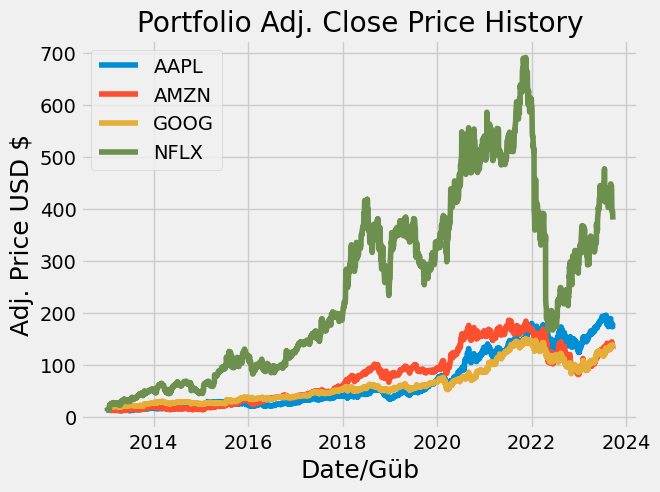

In [17]:
# Visually show the stock / portfolio
# Hisse senedini / portföyü görsel olarak gösterin
title="Portfolio Adj. Close Price History"

# Get the stocks
# Hisse senetlerini al
my_stocks=df

# Create and plot the graph
# Grafiği oluşturun ve çizin
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)
        
plt.title(title)
plt.xlabel("Date/Güb",fontsize=18)
plt.ylabel("Adj. Price USD $",fontsize=18)
plt.legend(my_stocks.columns.values,loc="upper left")
plt.show()

In [18]:
# Show the daily simple return
# Günlük basit getiriyi göster
returns=df.pct_change()
returns

,AAPL,AMZN,GOOG,NFLX
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,0.049777
2013-01-04,-0.027854,0.002592,0.019760,-0.006315
2013-01-07,-0.005883,0.035925,-0.004363,0.033549
2013-01-08,0.002692,-0.007748,-0.001974,-0.020565
...,...,...,...,...
2023-09-18,0.016913,-0.002920,0.004772,-0.006399
2023-09-19,0.006181,-0.016788,-0.000936,0.004564
2023-09-20,-0.019992,-0.017002,-0.030541,-0.024987


In [19]:
# Create and show the annualized covariance matrix
# Yıllıklandırılmış kovaryans matrisini oluşturun ve gösterin
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,AAPL,AMZN,GOOG,NFLX
AAPL,0.081947,0.046648,0.044439,0.043380
AMZN,0.046648,0.107119,0.056340,0.073257
GOOG,0.044439,0.056340,0.075110,0.055324
NFLX,0.043380,0.073257,0.055324,0.221969


In [20]:
# # Calculate the portfolio variance
# port_varience=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
# port_varience

In [21]:
import numpy as np

# Assuming you have 4 assets in your portfolio
# Portföyünüzde 4 varlık olduğunu varsayalım
assets = ["AAPL", "AMZN", "GOOG", "NFLX"]
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Adjust weights accordingly / Ağırlıkları buna göre ayarlayın

# Assuming you have a 4x4 covariance matrix for these 4 assets
# Bu 4 varlık için 4x4 kovaryans matrisiniz olduğunu varsayalım
cov_matrix_annual = returns[assets].cov() * 252

# Calculate the portfolio variance
# Portföy varyansını hesaplayın
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

In [22]:
port_variance

0.07030746386790093

In [23]:
# Calculate the portfolio volatility aka standard deviation
# Portföy volatilitesini yani standart sapmayı hesaplayın
port_volatility=np.sqrt(port_variance)
port_volatility

0.2651555465531523

In [24]:
# Calculate the annual portfolio return
# Yıllık portföy getirisini hesaplayın
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.29398972119788214

In [25]:
# Show the expected annual return, volatility (risk), and varience
# Beklenen yıllık getiriyi, volatiliteyi (riski) ve varyansı gösterin
percent_var=str(round(port_variance,2)*100)+"%"
percent_vols=str(round(port_volatility,2)*100)+"%"
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+"%"

print("Expected annual returns / Beklenen yıllık getiri: "+percent_ret)
print("Expected volatility / risky - Beklenen oynaklık / riskli: "+percent_vols)
print("Expected variance / Beklenen varyans: "+percent_var)

Expected annual returns / Beklenen yıllık getiri: 28.999999999999996%
Expected volatility / risky - Beklenen oynaklık / riskli: 27.0%
Expected variance / Beklenen varyans: 7.000000000000001%


In [26]:
!pip install PyPortfolioOpt

In [27]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [28]:
# Portfolio Optimization
# Portföy Optimizasyonu


# Calculate the expected returns and the annualised sample covariance matrix of asset returns
# Varlık getirilerinin beklenen getirilerini ve yıllıklaştırılmış örnek kovaryans matrisini hesaplayın
mu= expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

# Optimize for max sharpe ratio
# Maksimum keskinlik oranı için optimize edin
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.5051), ('AMZN', 0.11665), ('GOOG', 0.09574), ('NFLX', 0.28251)])
Expected annual return: 27.5%
Annual volatility: 26.8%
Sharpe Ratio: 0.95


(0.2752682853938496, 0.2683711810387691, 0.9511762194651345)

In [29]:
0.47904+0.13797+0.11074+0.27225

1.0

In [30]:
# Get the discrete allocation of each share per stock
# Hisse başına her hissenin ayrı ayrı tahsisini alın
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

latest_prices=get_latest_prices(df)
weight=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=15000)

allocation,leftover=da.lp_portfolio()
print("Discrete allocation/Ayrık tahsis:",allocation)
print("Funds remaining/Kalan fon: ${:.2f}".format(leftover))

Discrete allocation/Ayrık tahsis: {'AAPL': 43, 'AMZN': 14, 'GOOG': 11, 'NFLX': 11}
Funds remaining/Kalan fon: $54.69
